# BRAIN TUMOR DETECTION USING CONVOLUTIONAL NEURAL NETWORKS (CNN)

                                                                                                           BY GRACE OYIZA ONIVEHU

#### **TOPIC OVERVIEW**
A brain tumor is a collection, or mass, of abnormal cells in the brain. The skull, which encloses the brain, is very rigid. Any growth inside such a restricted space can cause problems. Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside the skull to increase. This can cause brain damage, and it can be life-threatening.

Hence, early detection and classification are crucial for selecting effective treatment to save patients life . 
Deep learning, particularly Convolutional Neural Networks (CNNs), can be used to enhance brain tumor diagnosis using MRI. A CNN-based multi-task model is used for tumor detection, classification (by grade, type, and malignancy), and location identification through segmentation, offering an efficient alternative to multiple specialized models.

# DATASET OVERVIEW
The dataset used for this project is the "Brain Tumor MRI Dataset" available on Kaggle. This dataset contains 7023 images of human brain MRI images which are classified into 4 classes: glioma, meningioma, no tumor and pituitary. For this project, the focus is on two sub classes: *Tumor (including Pituitary, Glioma, and Meningioma) and no tumor*.

## The 4 Classes of Brain Tumors
- **Pituitary Tumor**: An abnormal growth in the pituitary gland, a small structure located at the base of the brain. These tumors can be either benign or malignant.
- **Glioma**: A type of tumor that develops in glial cells, which support and protect neurons. Gliomas are the most common form of brain tumors.
- **Meningioma**: A tumor affecting the meninges, the protective membranes surrounding the brain and spinal cord. While most meningiomas are benign, some may become malignant.
- **No tumor**: A brain scan that shows no signs of tumor presence.

# METHODOLOGY

- **Data Collection**: Open source data "Brain Tumor MRI Dataset" available on Kaggle.

- **Data Preprocessing**: Resized all images to 150×150 pixels, normalized the pixel values to the [0,1] range, and converted them to RGB format.

- **Model Development**: Designed and implemented a convolutional neural network (CNN) tailored for classifying brain tumor types.

- **Model Training**: Trained the CNN using mini-batch gradient descent and optimized it to achieve a test accuracy of approximately 95.19%.

- **Model Evaluation**: Validated the model's performance by evaluating it on a separate test dataset to assess its generalizability.

- **Model Deployment**: Deployed into a real-time, user-friendly Streamlit web application

# IMPORTING NECCESSARY LIBRARIES

In [95]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# IMAGE DIMENSIONS

### Defining image dimensions and batch size

In [97]:
img_width, img_height = 150, 150
batch_size = 32

# DATASET LOADING

In [99]:
train_dir = "C:/Users/HP/Desktop/brain-tumors-dataset/Training"
test_dir = "C:/Users/HP/Desktop/brain-tumors-dataset/Testing"


### Training dataset

In [101]:
raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=batch_size
)
class_names = raw_train_dataset.class_names
print("Class names:", class_names)


Found 5712 files belonging to 4 classes.
Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']


### Testing dataset

In [103]:
raw_test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=batch_size
)

Found 1311 files belonging to 4 classes.


# NORMALIZING THE IMAGES

### by scaling pixel values to [0, 1]

In [105]:
normalization_layer = layers.Rescaling(1.0/255)
train_dataset = raw_train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = raw_test_dataset.map(lambda x, y: (normalization_layer(x), y))

# DATA VISUALIZATION

#### Visualizing some images & Dataset Distribution

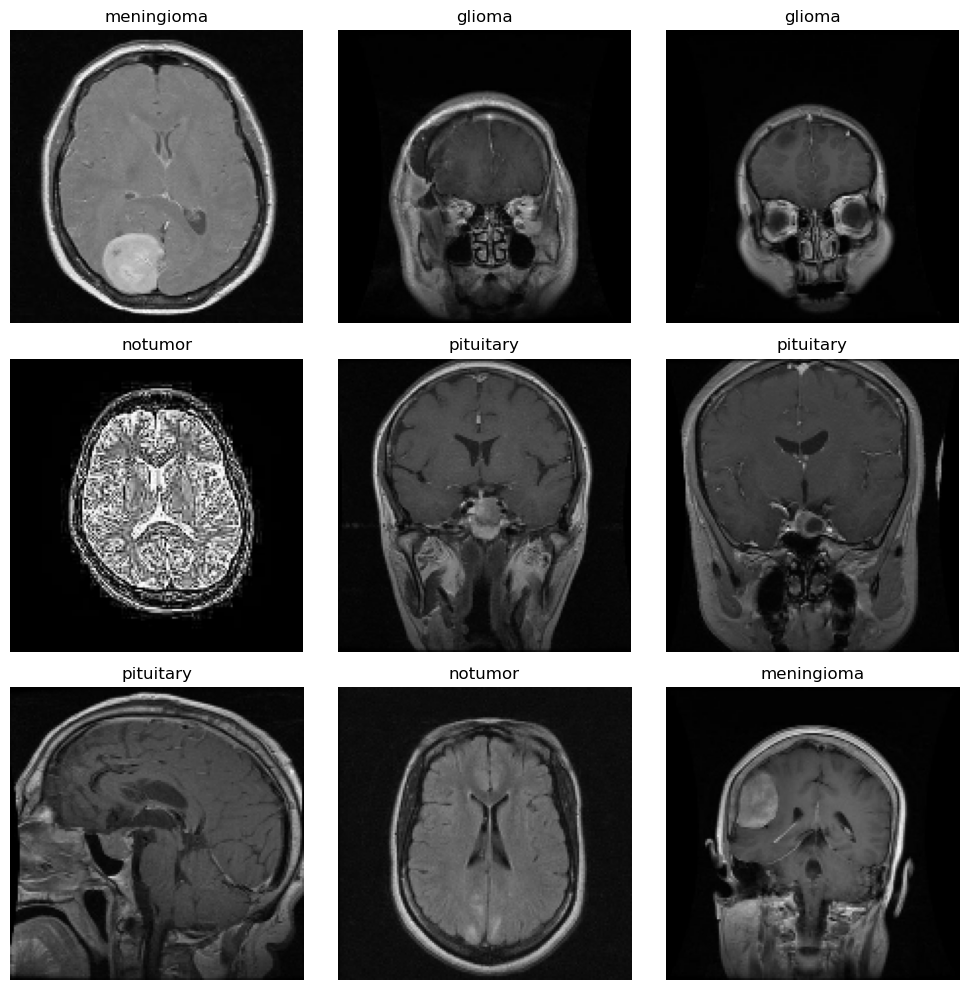

In [107]:
# Plotting 9 images from one batch with their class names
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        label_index = int(labels[i].numpy())
        plt.title(class_names[label_index])
        plt.axis('off')
plt.tight_layout()
plt.show()

### Count of images in each class in the training dataset

In [110]:
class_counts = {name: 0 for name in class_names}
for images, labels in raw_train_dataset:
    for label in labels.numpy():
        class_counts[class_names[label]] += 1

print("Class distribution:", class_counts)

Class distribution: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}


### A pie chart showing the class distribution

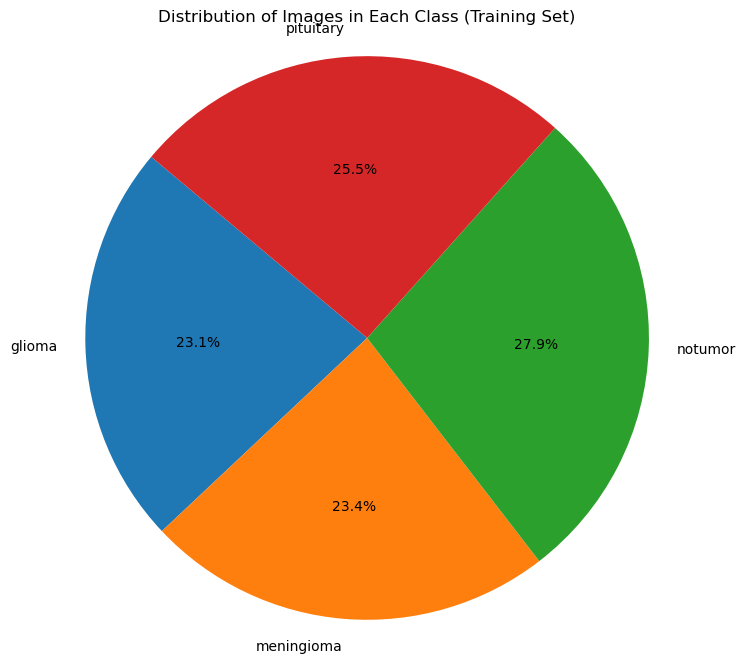

In [114]:
labels_list = list(class_counts.keys())
counts_list = list(class_counts.values())

plt.figure(figsize=(8, 8))
plt.pie(counts_list, labels=labels_list, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title("Distribution of Images in Each Class (Training Set)")
plt.axis('equal')
plt.show()

### A bar chart showing the class distribution

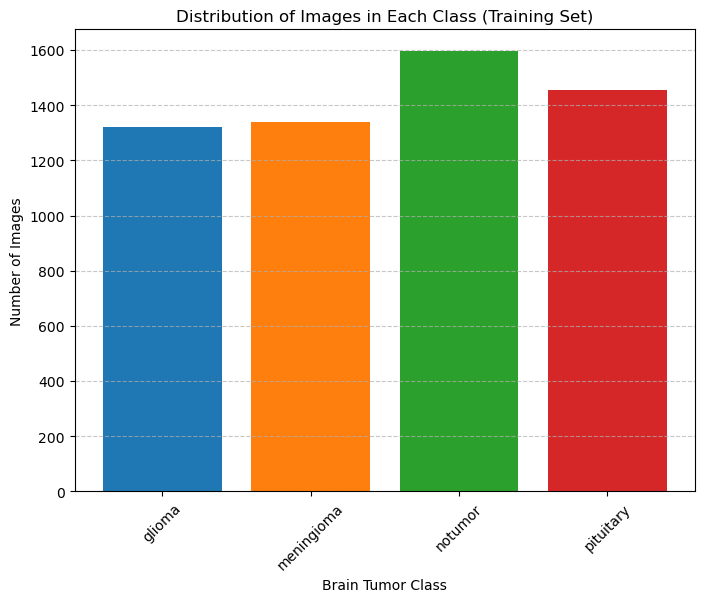

In [116]:
plt.figure(figsize=(8, 6))
plt.bar(labels_list, counts_list, color=plt.cm.tab10.colors[:len(labels_list)])
plt.xlabel("Brain Tumor Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Images in Each Class (Training Set)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# BUILDING THE CNN MODEL

In [118]:
# Define the CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(4, activation='softmax')  # 4 classes
])


### Compile the model

In [120]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Train the model with early stopping

In [122]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [124]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=20, 
    callbacks=[early_stopping]
)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 661ms/step - accuracy: 0.5104 - loss: 1.0686 - val_accuracy: 0.7117 - val_loss: 0.7176
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 112s 621ms/step - accuracy: 0.7617 - loss: 0.6293 - val_accuracy: 0.7193 - val_loss: 0.6227
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 115s 641ms/step - accuracy: 0.8172 - loss: 0.4855 - val_accuracy: 0.7719 - val_loss: 0.5448
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 116s 645ms/step - accuracy: 0.8360 - loss: 0.4366 - val_accuracy: 0.8139 - val_loss: 0.4620
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 118s 658ms/step - accuracy: 0.8676 - loss: 0.3685 - val_accuracy: 0.8406 - val_loss: 0.3861
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 119s 666ms/step - accuracy: 0.8819 - loss: 0.3215 - val_accuracy: 0.8627 - val_loss: 0.3471
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 113s 631ms/step - accuracy: 0.8921 - loss: 0.2817 - val_accuracy: 0.8642 - val_loss: 0.3462
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 116s 648ms/step - accuracy: 0.9094 -

In [125]:
# Model summary

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,486,606 (55.26 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,657,738 (36.84 MB)

# EVALUATING THE MODEL ON TEST DATA

In [128]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9503 - loss: 0.1446
Test Accuracy: 95.19%


# PLOTTING TRAINING PERFORMANCE

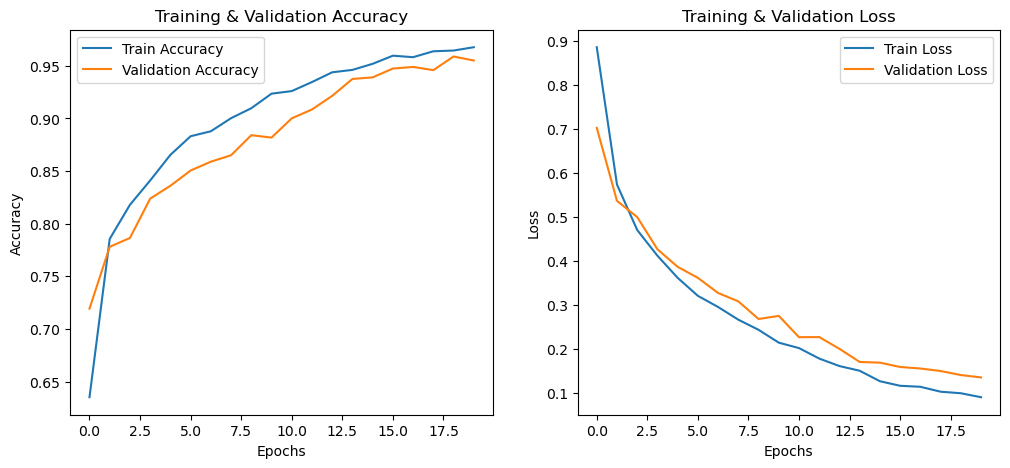

In [28]:
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()

# SAVING THE MODEL

In [132]:
model.save("improved_brain_tumor_model.keras")

# CONCLUSION

### Result:
- **Training Accuracy (97.54%%)** - The model performs very well on the training data, meaning it has learned patterns from the dataset effectively.
  
- **Test Accuracy (95.19%)** - The model generalizes well to unseen data, as the test accuracy is close to the training accuracy.

### Remark:
- The final CNN model achieved 95.19% test accuracy.

- With proper preprocessing, augmentation, and architectural enhancements, CNNs can reliably detect brain tumors.

- Normalization scaled pixel values from [0, 255] to [0, 1], ensuring consistent input, stabilizing training, improving convergence, and ultimately increasing model accuracy.

- This model has potential for aiding early diagnosis and treatment planning, improving patient outcomes.